<a href="https://colab.research.google.com/github/Sra1panasa/NLP/blob/main/Graphs_NER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Knowledge Graphs with NER:**

* A knowledge graph is a data type or data structure in which the information is stored in a graphical structure. 
* We can say it is a topology to integrate data. Mainly the knowledge graph is used for storing the information which is interlinked. 
* Because of this inter-linked connection of information, we can say the graph is a set of some nodes and some edges.
* **In the knowledge graph, the nodes are the holder of the entity information where the edges are the links between the nodes which are holding the information about the relationship between the nodes**.

* *****We will finally create a knowledge graph from the extracted entities (subject-object pairs) and the predicates (relation between entities).**

* Google is trying to make real-world connections using a knowledge graph. It is used worldwide to create better, personalised content and engage with the target audience. It is increasingly being used by celebrities and entrepreneurs for better engaging with their fans and audiences. These Knowledge Graphs by Google are going to help greatly in improving the AI and ML research.
* must visit

 must visit below site.
  https://analyticsindiamag.com/hands-on-guide-to-building-knowledge-graph-for-named-entity-recognition/

  https://www.kaggle.com/pavansanagapati/knowledge-graph-nlp-tutorial-bert-spacy-nltk

  https://github.com/dmlc/dgl/tree/master/apps/kg


* Let us have a look at the below image where node A is having the entity Virat Kohli and node B is having the entity Indian cricket team. And the edge consists of the knowledge “captain of”.

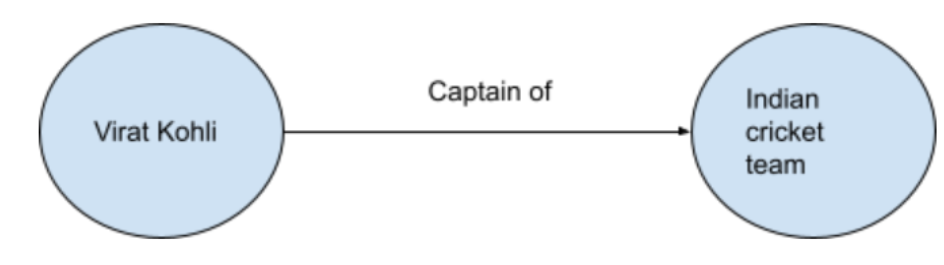

* **By this we can say that an entity can have multiple relationships with the other entities. The below image is the representation of a node having relation with more than one node**.

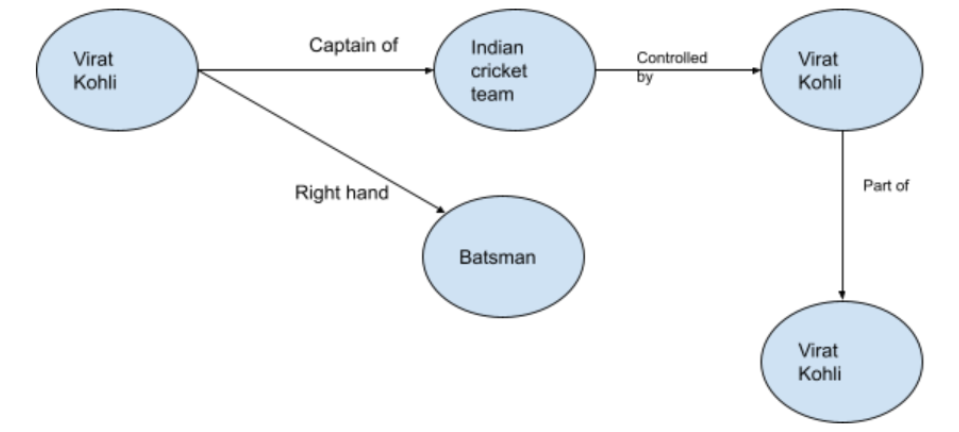

In [ ]:
import pandas as pd
tokens= ['RESTORAN', 'WAN', 'SHENG', '002043319-W', 'NO.2', '', 'JALAN', 'TEMENGGUNG', '19/9', 'SEKSYEN', '9', '', 'BANDAR', 'MAHKOTA', 'CHERAS', '43200', 'CHERAS', '', 'SELANGOR', 'GST', 'REG', 'NO:', '001335787520', 'TAX', 'INVOICE', 'INV', 'NO.:', '1076565', 'CASHIER', ':', 'THANDAR', 'DATE', ':', '04-04-2018', '14:26:20', 'DESCRIPTION', 'QTY', 'U.PRICE', 'TOTAL', 'TAX', 'TEH', '(B)', '1', '1', 'X', '2.20', 'SR', 'CHAM', '(B)', 'MILO', '(B)', '2.80', 'TAKE', 'AWAY', '3', 'X', '0.20', '0.60', 'TOTAL', 'QTY:', '6', 'TOTAL', '(EXCLUDING', 'GST):', '7.37', 'GST', 'PAYABLE', '(6%):', '0.43', 'TOTAL', '(INCLUSIVE', 'OF', 'GST):', '7.80', 'TOTAL', ':', 'CASH', ':', 'GST', 'SUMMARY', 'AMOUNT(RM)', 'TAX(RM)', '(@', '6%)']
#print(tokens)

text = "Bhubaneswar is the capital and largest city of the Indian state of Odisha. The city is bounded by the Daya River"


['RESTORAN', 'WAN', 'SHENG', '002043319-W', 'NO.2', '', 'JALAN', 'TEMENGGUNG', '19/9', 'SEKSYEN', '9', '', 'BANDAR', 'MAHKOTA', 'CHERAS', '43200', 'CHERAS', '', 'SELANGOR', 'GST', 'REG', 'NO:', '001335787520', 'TAX', 'INVOICE', 'INV', 'NO.:', '1076565', 'CASHIER', ':', 'THANDAR', 'DATE', ':', '04-04-2018', '14:26:20', 'DESCRIPTION', 'QTY', 'U.PRICE', 'TOTAL', 'TAX', 'TEH', '(B)', '1', '1', 'X', '2.20', 'SR', 'CHAM', '(B)', 'MILO', '(B)', '2.80', 'TAKE', 'AWAY', '3', 'X', '0.20', '0.60', 'TOTAL', 'QTY:', '6', 'TOTAL', '(EXCLUDING', 'GST):', '7.37', 'GST', 'PAYABLE', '(6%):', '0.43', 'TOTAL', '(INCLUSIVE', 'OF', 'GST):', '7.80', 'TOTAL', ':', 'CASH', ':', 'GST', 'SUMMARY', 'AMOUNT(RM)', 'TAX(RM)', '(@', '6%)']


In [ ]:
import spacy
from spacy.lang.en import English
import networkx as nx
import matplotlib.pyplot as plt

def getSentences(text):
    nlp = English()
    nlp.add_pipe(nlp.create_pipe('sentencizer'))
    document = nlp(text)
    return [sent.string.strip() for sent in document.sents]

def printToken(token):
    print(token.text, "->", token.dep_)
def appendChunk(original, chunk):
    return original + ' ' + chunk
def isRelationCandidate(token):
    deps = ["ROOT", "adj", "attr", "agent", "amod"]
    return any(subs in token.dep_ for subs in deps)
def isConstructionCandidate(token):
    deps = ["compound", "prep", "conj", "mod"]
    return any(subs in token.dep_ for subs in deps)
def processSubjectObjectPairs(tokens):
    subject = ''
    object = ''
    relation = ''
    subjectConstruction = ''
    objectConstruction = ''
    for token in tokens:
        printToken(token)
        if "punct" in token.dep_:
            continue
        if isRelationCandidate(token):
            relation = appendChunk(relation, token.lemma_)
        if isConstructionCandidate(token):
            if subjectConstruction:
                subjectConstruction = appendChunk(subjectConstruction, token.text)
            if objectConstruction:
                objectConstruction = appendChunk(objectConstruction, token.text)
        if "subj" in token.dep_:
            subject = appendChunk(subject, token.text)
            subject = appendChunk(subjectConstruction, subject)
            subjectConstruction = ''
        if "obj" in token.dep_:
            object = appendChunk(object, token.text)
            object = appendChunk(objectConstruction, object)
            objectConstruction = ''
    print (subject.strip(), ",", relation.strip(), ",", object.strip())
    return (subject.strip(), relation.strip(), object.strip())
def processSentence(sentence):
    tokens = nlp_model(sentence)
    return processSubjectObjectPairs(tokens)
def printGraph(triples):
    G = nx.Graph()
    for triple in triples:
        G.add_node(triple[0])
        G.add_node(triple[1])
        G.add_node(triple[2])
        G.add_edge(triple[0], triple[1])
        G.add_edge(triple[1], triple[2])
    pos = nx.spring_layout(G)
    plt.figure(figsize=(12, 8))
    nx.draw(G, pos, edge_color='black', width=1, linewidths=1,
            node_size=500, node_color='skyblue', alpha=0.9,
            labels={node: node for node in G.nodes()})
    plt.axis('off')
    plt.show()

['RESTORAN', 'WAN', 'SHENG', '002043319-W', 'NO.2', '', 'JALAN', 'TEMENGGUNG', '19/9', 'SEKSYEN', '9', '', 'BANDAR', 'MAHKOTA', 'CHERAS', '43200', 'CHERAS', '', 'SELANGOR', 'GST', 'REG', 'NO:', '001335787520', 'TAX', 'INVOICE', 'INV', 'NO.:', '1076565', 'CASHIER', ':', 'THANDAR', 'DATE', ':', '04-04-2018', '14:26:20', 'DESCRIPTION', 'QTY', 'U.PRICE', 'TOTAL', 'TAX', 'TEH', '(B)', '1', '1', 'X', '2.20', 'SR', 'CHAM', '(B)', 'MILO', '(B)', '2.80', 'TAKE', 'AWAY', '3', 'X', '0.20', '0.60', 'TOTAL', 'QTY:', '6', 'TOTAL', '(EXCLUDING', 'GST):', '7.37', 'GST', 'PAYABLE', '(6%):', '0.43', 'TOTAL', '(INCLUSIVE', 'OF', 'GST):', '7.80', 'TOTAL', ':', 'CASH', ':', 'GST', 'SUMMARY', 'AMOUNT(RM)', 'TAX(RM)', '(@', '6%)']
********
Bhubaneswar is the capital and largest city of the Indian state of Odisha. The city is bounded by the Daya River to the south and the Kuakhai River to the east; the Chandaka Wildlife Sanctuary and Nandankanan Zoo lie in the western and northern parts of Bhubaneswar.
RESTOR

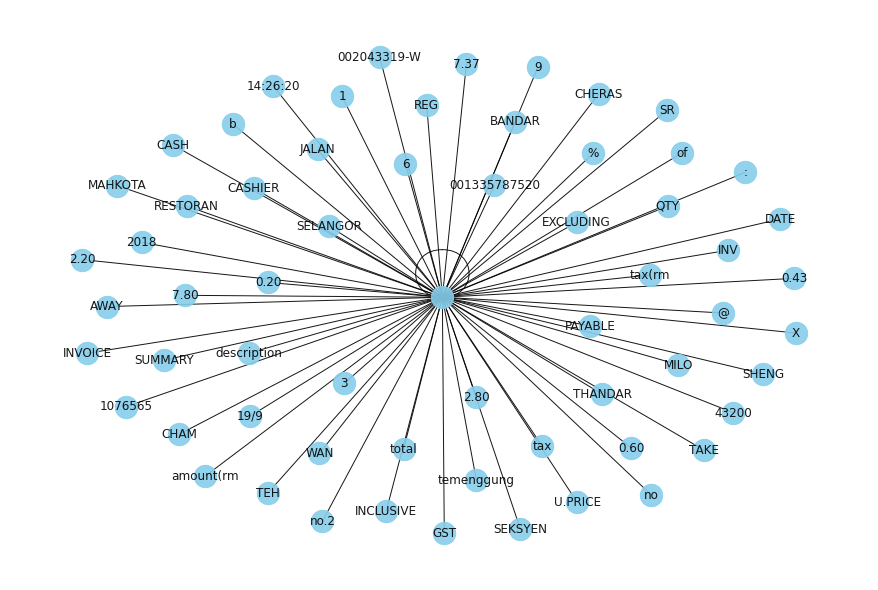

In [ ]:
text = "Bhubaneswar is the capital and largest city of the Indian state of Odisha. The city is bounded by the Daya River " \
            "to the south and the Kuakhai River to the east; the Chandaka Wildlife Sanctuary "\
            "and Nandankanan Zoo lie in the western and northern parts of Bhubaneswar." 


#sentences = getSentences(text)
sentences=['RESTORAN', 'WAN', 'SHENG', '002043319-W', 'NO.2', '', 'JALAN', 'TEMENGGUNG', '19/9', 'SEKSYEN', '9', '', 'BANDAR', 'MAHKOTA', 'CHERAS', '43200', 'CHERAS', '', 'SELANGOR', 'GST', 'REG', 'NO:', '001335787520', 'TAX', 'INVOICE', 'INV', 'NO.:', '1076565', 'CASHIER', ':', 'THANDAR', 'DATE', ':', '04-04-2018', '14:26:20', 'DESCRIPTION', 'QTY', 'U.PRICE', 'TOTAL', 'TAX', 'TEH', '(B)', '1', '1', 'X', '2.20', 'SR', 'CHAM', '(B)', 'MILO', '(B)', '2.80', 'TAKE', 'AWAY', '3', 'X', '0.20', '0.60', 'TOTAL', 'QTY:', '6', 'TOTAL', '(EXCLUDING', 'GST):', '7.37', 'GST', 'PAYABLE', '(6%):', '0.43', 'TOTAL', '(INCLUSIVE', 'OF', 'GST):', '7.80', 'TOTAL', ':', 'CASH', ':', 'GST', 'SUMMARY', 'AMOUNT(RM)', 'TAX(RM)', '(@', '6%)']
print(sentences)
print("********")
nlp_model = spacy.load('en_core_web_sm')
triples = []
print (text)
for sentence in sentences:
    triples.append(processSentence(sentence))
printGraph(triples)